In [0]:
%matplotlib inline
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.utils import *
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def get_model(x_train,y_train,x_test,y_test):
  """
    Returns the trained model (using Model API) with input and output tensors 
  
  """
  inputs = Input(shape=(784,))
  x = Dense(512, activation='relu')(inputs)
  x = Dense(512, activation='relu')(x)
  predictions = Dense(10, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=predictions)
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])   
  model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size =128, verbose=2)
  
  return model            

In [0]:
def train_model():
   """
    Preprocesses the input and output vectors
  
  """
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.reshape(60000,784)                            # As input is a vector = 28 * 28 pixel size  = 784
  x_test = x_test.reshape(10000,784)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255                                                  # Grayscale (0-255), convert into [0,1]
  x_test /= 255
  digits = 10
  y_train = to_categorical(y_train,digits)                        # Target values not taken as numerical values; as different items(one-hot encoded vectors)
  y_test = to_categorical(y_test,digits)
  
  model = get_model(x_train,y_train,x_test,y_test)
  y_test_pred = model.predict(x_test)
  
  for i in range(10):
    img = x_test[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print("Target Value",np.argmax(y_test_pred[i]))
  
  acc = model.evaluate(x_test,y_test,verbose=2)
  print('\nTEST ACCURACY: ',acc[1])
  
  return model

W0730 04:04:50.317118 140177953580928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 04:04:50.376528 140177953580928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2215 - acc: 0.9347 - val_loss: 0.1095 - val_acc: 0.9671
Epoch 2/10
 - 9s - loss: 0.0825 - acc: 0.9746 - val_loss: 0.0995 - val_acc: 0.9681
Epoch 3/10
 - 9s - loss: 0.0526 - acc: 0.9833 - val_loss: 0.0803 - val_acc: 0.9730
Epoch 4/10
 - 9s - loss: 0.0361 - acc: 0.9887 - val_loss: 0.0662 - val_acc: 0.9803
Epoch 5/10
 - 10s - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0801 - val_acc: 0.9772
Epoch 6/10
 - 9s - loss: 0.0228 - acc: 0.9927 - val_loss: 0.0863 - val_acc: 0.9770
Epoch 7/10
 - 9s - loss: 0.0198 - acc: 0.9932 - val_loss: 0.0822 - val_acc: 0.9793
Epoch 8/10
 - 9s - loss: 0.0174 - acc: 0.9941 - val_loss: 0.0748 - val_acc: 0.9799
Epoch 9/10
 - 9s - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0922 - val_acc: 0.9778
Epoch 10/10
 - 9s - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0681 - val_acc: 0.9841


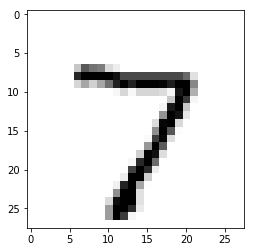

Target Value 7


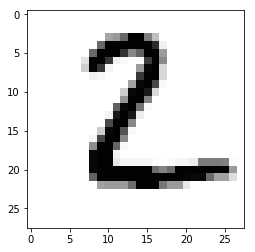

Target Value 2


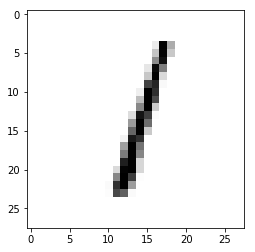

Target Value 1


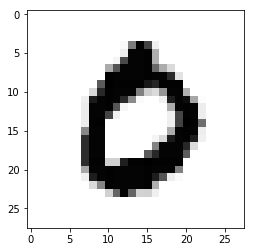

Target Value 0


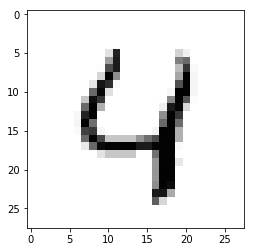

Target Value 4


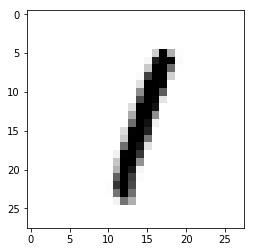

Target Value 1


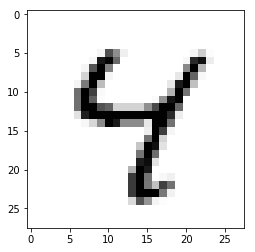

Target Value 4


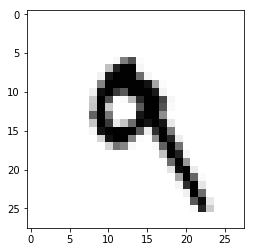

Target Value 9


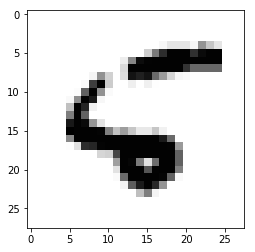

Target Value 5


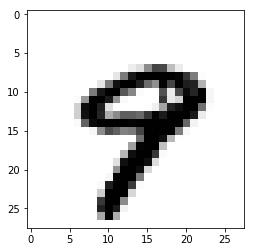

Target Value 9

TEST ACCURACY:  0.9841


In [0]:
train_model()